# Pymkm demo: CO2 hydrogenation to MeOH over Pd-In2O3 catalyst

## MKM class import, object instance and attributes overview

In [1]:
import os, sys
sys.path.insert(0, "../") 
from mkm import MKM

To create an instance of the MKM class, three parameters must be provided: <br>
1) a name for the catalytic system under study. <br>
2) the path to the rm.mkm file containing the reaction mechanism. <br>
3) the path to the g.mkm file containing the reaction energy profile. <br>
4) a list of inert species in case these are present in the system (optional). <br>
5) the temperature at which the entropic contributions have been computed (optional). <br>

In [2]:
model = MKM('Pd-In2O3',
            'rm.mkm', 
            'g.mkm', 
            inerts=[], 
            t_ref=553, 
            reactor='differential')

# Model exploration
To investigate the characteristics of the system we are studying, several attributes can be easily inspected to check general information like number of elementary reactions, energetics, reaction network, etc.

In [3]:
print(model)

System: Pd-In2O3

CO2 + 3H2 -> CH3OH + H2O
CO2 + H2 -> CO + H2O

Number of global reactions: 2
Number of elementary reactions: 20
Number of surface species: 17
Number of gas species: 5



In [4]:
model.df_gibbs

,,$\Delta$G_reaction / eV,$\Delta$G_barrier / eV,"$\Delta$G_barrier,reverse / eV"
R1,ads,9.000000e-02,0.09,0.000000e+00
R2,ads,3.600000e-01,0.36,0.000000e+00
R3,ads,2.700000e-01,0.27,0.000000e+00
R4,ads,-3.685940e-14,0.00,3.685940e-14
R5,sur,-3.500000e-01,0.92,1.270000e+00
R6,ads,-4.100000e-01,0.00,4.100000e-01
R7,sur,7.800000e-01,1.55,7.700000e-01
R8,sur,1.000000e-01,0.10,0.000000e+00
R9,sur,1.800000e+00,1.80,0.000000e+00
R10,sur,-9.200000e-01,0.00,9.200000e-01


## Thermodynamic consistency analysis

A often overlooked aspect in microkinetic models is its thermodynamic consistency: although we are dealing with catalysis, a kinetic phenomenon, it is strictly bound to thermodynamic constraints. Currently, pymkm allows a quantitative estimation of thermodynamic consistency of microkinetic models: this is done comparing directly the equilibrium constants of the global reaction we are studying with the global constants built from the elementary reactions proposed in the reaction network. This can be easily done using the .thermodynamic_consistency_analysis() method, that needs as input only the temperature at which we want to perform the analysis.

In [5]:
model.thermochemistry(553)

Pd-In2O3: Thermochemistry
Temperature: 553K

---------------------------------------------------------------------
CO2 + 3H2 -> CH3OH + H2O
Model:    DHR=-1.18e+02 kJ/mol    DSR=-2.77e-01 kJ/mol/K     DGR=1.47e+04 kJ/mol
Database: DHR=-6.39e+01 kJ/mol    DSR=-2.04e-01 kJ/mol/K     DGR=4.87e+01 kJ/mol
---------------------------------------------------------------------

CO2 + H2 -> CO + H2O
Model:    DHR=6.85e+01 kJ/mol    DSR=1.92e-02 kJ/mol/K     DGR=-9.56e+02 kJ/mol
Database: DHR=3.93e+01 kJ/mol    DSR=3.74e-02 kJ/mol/K     DGR=1.87e+01 kJ/mol
---------------------------------------------------------------------



In [6]:
model.thermodynamic_consistency_analysis(553)

 Pd-In2O3: Thermodynamic consistency analysis
 Temperature = 553K

----------------------------------------------------------------------------------
CO2 + 3H2 -> CH3OH + H2O
Model:    keqH=1.31e+11    keqS=3.23e-15    Keq=4.25e-04
Database: keqH=1.09e+06    keqS=2.33e-11    Keq=2.53e-05
----------------------------------------------------------------------------------

CO2 + H2 -> CO + H2O
Model:    keqH=3.38e-07    keqS=1.01e+01    Keq=3.40e-06
Database: keqH=1.93e-04    keqS=8.99e+01    Keq=1.73e-02
----------------------------------------------------------------------------------



It is easy to observe from the generated report that the model is not thermodynamically consistent, both at enthalpic and entropic level, as the equilibrium constants of the global reactions calculated with DFT are order of magnitude different from the values extracted from the thermochemistry database. However, considering the MeOH reaction, observing the equilibrium constant one could think the gap is not so huge: this is due to the fact that enthalpy and entropy constants compensate each pther in the opposite direction, "canceling" the discrepancy between database and DFT-derived equilibrium constants.

## Step 2: microkinetic model single run

In [7]:
exp_nojac = model.single_run(553, 5e6, [0.8,0.2,0,0,0], jac=False)

Pd-In2O3: Microkinetic run
Reactor model: Differential PFR
Temperature = 553K    Pressure = 50.0bar
Gas composition: H2=80.0%  CO2=20.0%  H2O=0.0%  CH3OH=0.0%  CO=0.0%  

MeOH Reaction Rate: 6.43e-02 1/s
MeOH Selectivity: 91.08%
Most Abundant Surface Intermediate: i21 Coverage: 87.88% 
CPU time: 1.76 s


In [8]:
exp_jac = model.single_run(553, 5e6, [0.8, 0.2, 0,0,0], jac=True)

Pd-In2O3: Microkinetic run
Reactor model: Differential PFR
Temperature = 553K    Pressure = 50.0bar
Gas composition: H2=80.0%  CO2=20.0%  H2O=0.0%  CH3OH=0.0%  CO=0.0%  

MeOH Reaction Rate: 6.43e-02 1/s
MeOH Selectivity: 91.08%
Most Abundant Surface Intermediate: i21 Coverage: 87.88% 
CPU time: 1.79 s


In [9]:
exp_nojac['solver']

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 25048
     njev: 44
      nlu: 2233
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 3.62661621e-68, 7.25323243e-68, ...,
       5.66283209e+03, 6.06274856e+03, 1.00000000e+04])
 t_events: None
        y: array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.47889192e-11, 1.47889192e-11, 1.47889192e-11],
       [0.00000000e+00, 1.73205078e-58, 3.46410156e-58, ...,
        1.24518803e-08, 1.24518803e-08, 1.24518803e-08],
       [0.00000000e+00, 3.20825549e-62, 6.41651099e-62, ...,
        3.38315601e-13, 3.38315601e-13, 3.38315601e-13],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0

In [9]:
exp_jac['solver']

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 25630
     njev: 82
      nlu: 2456
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 3.62661621e-68, 7.25323243e-68, ...,
       9.93714917e+03, 9.94356252e+03, 1.00000000e+04])
 t_events: None
        y: array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.47889192e-11, 1.47889192e-11, 1.47889192e-11],
       [0.00000000e+00, 1.73205078e-58, 3.46410156e-58, ...,
        1.24518803e-08, 1.24518803e-08, 1.24518803e-08],
       [0.00000000e+00, 3.20825549e-62, 6.41651099e-62, ...,
        3.38315601e-13, 3.38315601e-13, 3.38315601e-13],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0

In [11]:
exp_jac['MASI']

{'i21': 87.87981373605864}

## Step 3: Apparent activation energy

Pd-In2O3: Apparent activation energy for RWGS reaction

Temperature range: 273-333K    Pressure = 50.0bar
Gas composition: H2=80.0%  CO2=20.0%  H2O=0.0%  CH3OH=0.0%  CO=0.0%  

Temperature = 273K    CPU Time: 0.68s
Temperature = 293K    CPU Time: 0.81s
Temperature = 313K    CPU Time: 1.01s
Temperature = 333K    CPU Time: 1.40s


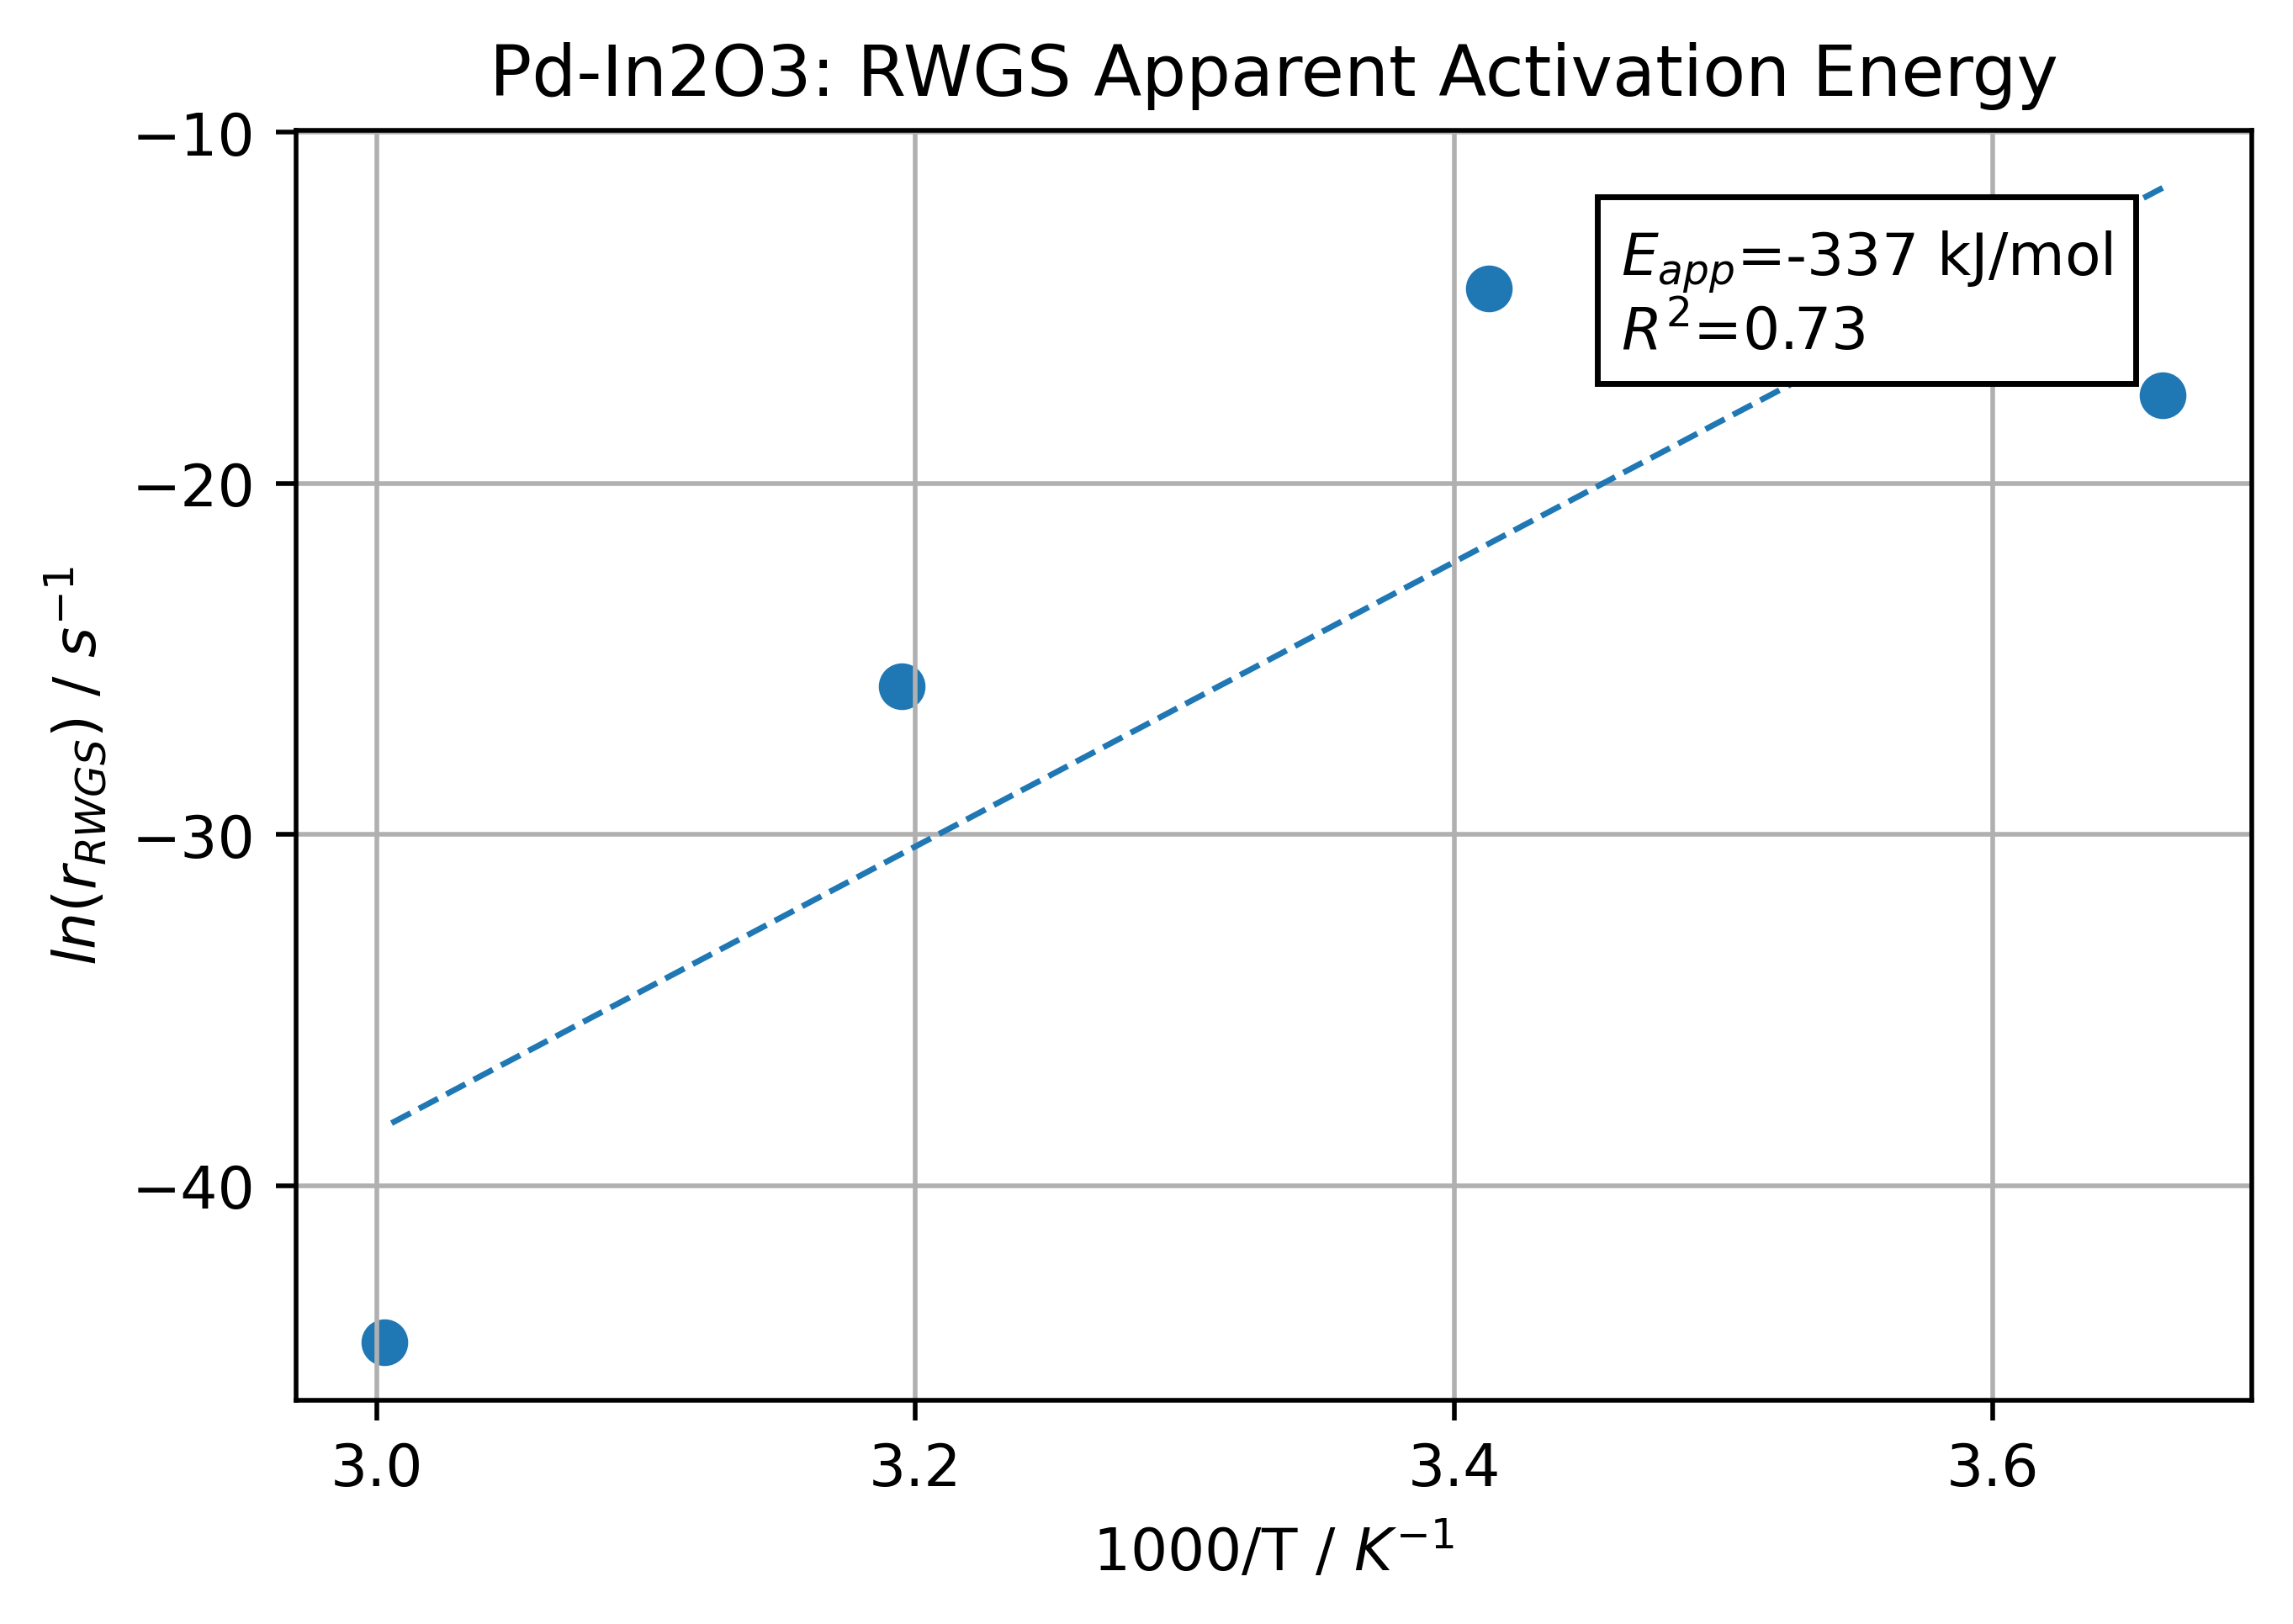

In [16]:
Eapp = model.calc_apparent_activation_energy([273,353,20], 5e6, [0.8,0.2,0,0,0], 'RWGS')

In [25]:
print(Eapp)

{'Tmin': 533, 'Tmax': 613, 'N': 5, 'P': 50.0, 'y_gas': {'H2(g)': 0.8, 'CO2(g)': 0.2, 'H2O(g)': 0, 'CH3OH(g)': 0, 'CO(g)': 0}, 'Eapp_MeOH': 150.29059266781312, 'R2': 0.9999796830922202}


## Step 4: Apparent reaction orders

In [15]:
import numpy as np
composition_matrix = np.array([[0.78,0.22,0,0,0],[0.8,0.2,0,0,0],[0.82,0.18,0,0,0]])

Pd-In2O3: CO2 Apparent reaction order for MeOH reaction

Temperature = 573K    Pressure = 50.0bar

Jacobian in use
y_CO2 = 0.22    CPU Time: 1.95s
Jacobian in use
y_CO2 = 0.20    CPU Time: 1.98s
Jacobian in use
y_CO2 = 0.18    CPU Time: 2.02s


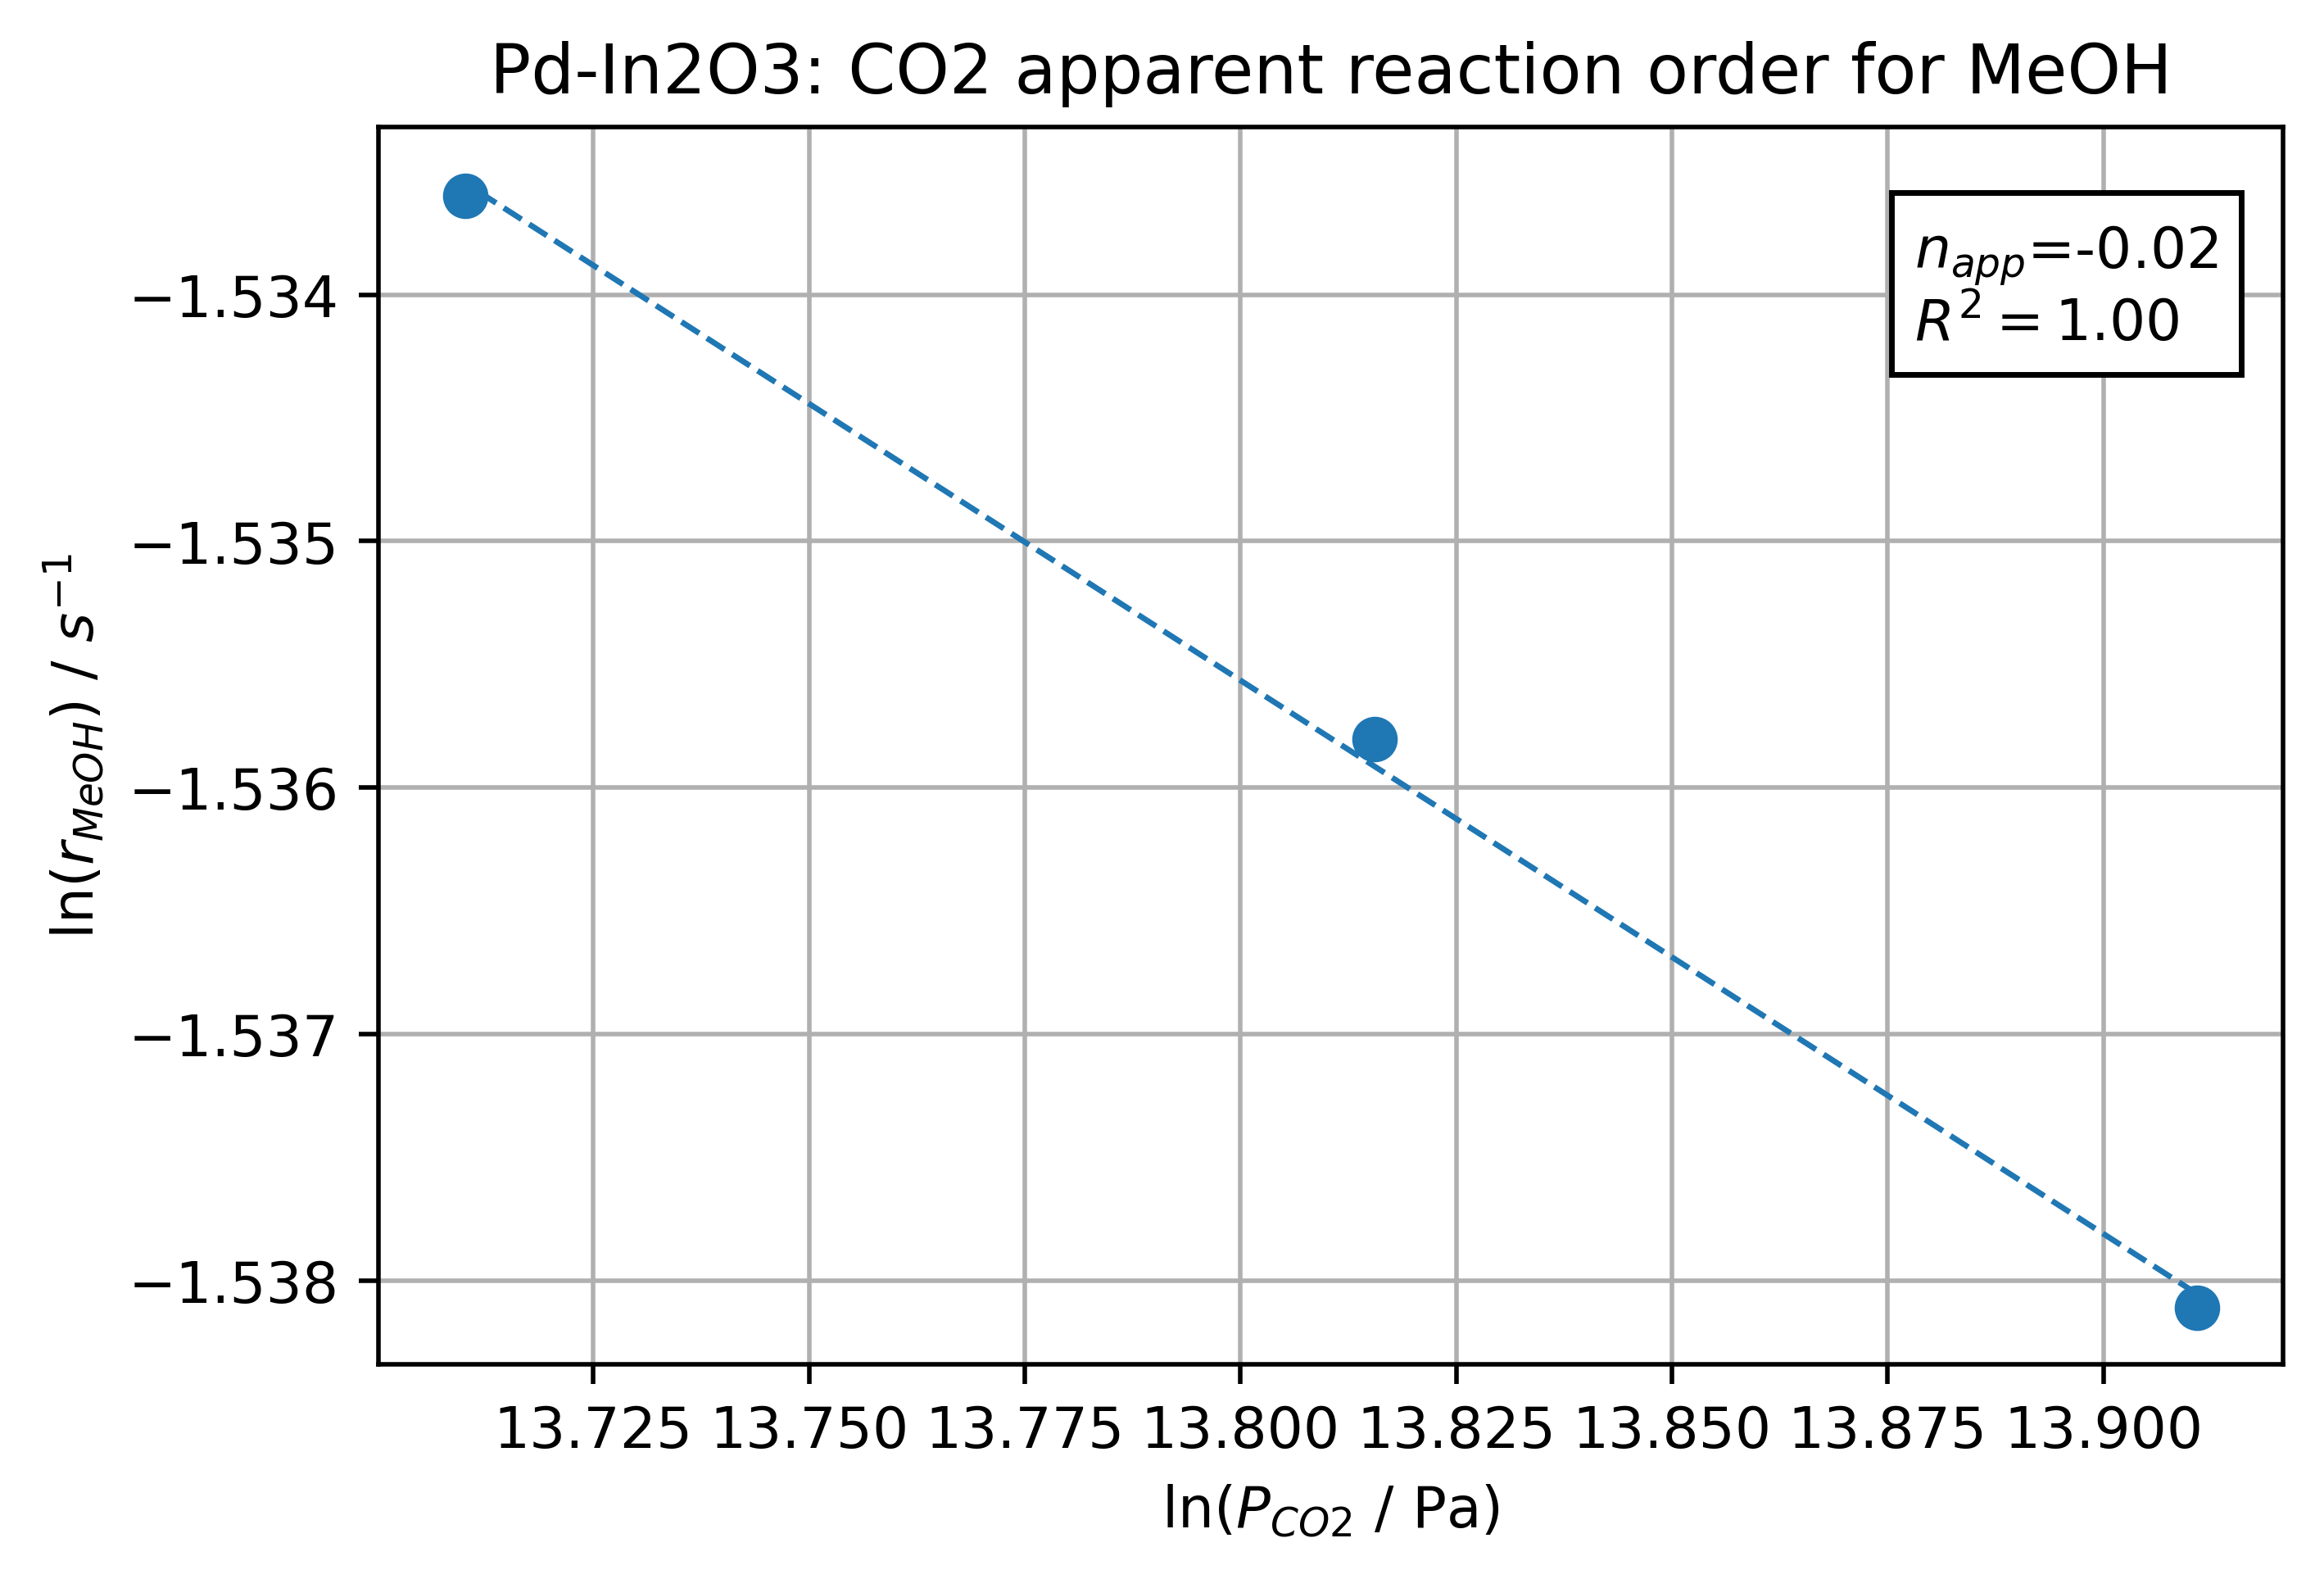

In [16]:
napp_H2 = model.calc_apparent_reaction_order(573, 5e6, composition_matrix, 'CO2', 'MeOH')

In [ ]:
napp_H2

## Descriptor search: Reversibility analysis

In [17]:
rev = model.calc_reversibility(573, 5e6, [0.8,0.2,0,0,0])

Pd-In2O3: Reversibility analysis
Temperature = 573K    Pressure = 50.0bar
Gas composition: H2=80.0%  CO2=20.0%  H2O=0.0%  CH3OH=0.0%  CO=0.0%  


In [18]:
type(rev)

pandas.io.formats.style.Styler

In [18]:
rev

,Reversibility [-]
R1,0.00
R2,0.00
R3,0.02
R4,1.00
R5,0.00
R6,0.88
R7,0.10
R8,1.00
R9,0.55
R10,0.19


## Rate-determining step search: Degree of rate and selectivity control

In [19]:
model.calc_drc_full(553, 5e6, [0.8,0.2,0,0,0], "MeOH")

Pd-In2O3: Full DRC and DSC analysis wrt MeOH global reaction
Temperature = 553K    Pressure = 50.0bar
Gas composition: H2=80.0%  CO2=20.0%  H2O=0.0%  CH3OH=0.0%  CO=0.0%  

R1
DRC = -0.00

R2
DRC = -0.00

R3
DRC = 0.00

R4


KeyboardInterrupt: 

In [21]:
_

(<pandas.io.formats.style.Styler at 0x7f5681ae7070>,
 <pandas.io.formats.style.Styler at 0x7f5681ac6d30>)

# Dynamic CSTR

If someone is interested in extracting also values related to conversion and yield, the differential PFR is not suitable for the purpose. In order to obtain this information, a macroscopic reactor model is needed.

In [5]:
model.set_reactor('dynamic')

'Reactor model: dynamic'

In [6]:
model.set_CSTR_params(radius=0.0022,
                  length=0.0022*10,
                  Q=0.66E-6,
                  S_BET=1.74E5,
                  m_cat=1.0E-4)

Reactor volume: 3.35e-07 [m3]
Inlet volumetric flowrate : 6.60e-07 [m3/s]
Residence time: 5.07e-01 [s]
Catalyst mass: 1.00e-04 [kg]
Catalyst surface: 1.74e+05 [m2/kg_cat]
Active site surface: 1.00e-19 [m2]


In [20]:
x = model.single_run(493, 5e6, [0.8,0.2,0,0,0])

Pd-In2O3: Microkinetic run
Reactor model: Dynamic CSTR
Temperature = 493K    Pressure = 50.0bar
Gas composition: H2=80.0%  CO2=20.0%  H2O=0.0%  CH3OH=0.0%  CO=0.0%  

MeOH Reaction Rate: 7.41e-04 1/s
MeOH Selectivity: 99.81%
Most Abundant Surface Intermediate: i21 Coverage: 93.97% 
CPU time: 12.88 s


In [21]:
xx = model.single_run(493, 5e6, [0.8,0.2,0,0,0], jac=True)

Pd-In2O3: Microkinetic run
Reactor model: Dynamic CSTR
Temperature = 493K    Pressure = 50.0bar
Gas composition: H2=80.0%  CO2=20.0%  H2O=0.0%  CH3OH=0.0%  CO=0.0%  
Jacobian in use

MeOH Reaction Rate: 7.41e-04 1/s
MeOH Selectivity: 99.81%
Most Abundant Surface Intermediate: i21 Coverage: 93.97% 
CPU time: 13.75 s


In [19]:
x.keys()

dict_keys(['T', 'P', 'y_in', 'theta', 'ddt', 'r', 'r_MeOH', 'r_RWGS', 'S_MeOH', 'MASI', 'y_out', 'conversion'])

In [20]:
x['MASI']

{'i21': 74.84628189452022}

In [21]:
x['r_RWGS']

1.0597246784573606e-12

In [22]:
x['r_MeOH']

1.1887920021263429e-05

In [23]:
x['conversion']

{'H2(g)': 0.062112461220757864, 'CO2(g)': 0.08281661988269073}

In [24]:
x['y_out']

{'H2(g)': 0.7760168662662614,
 'CO2(g)': 0.18972151324148837,
 'H2O(g)': 0.01713081024612505,
 'CH3OH(g)': 0.01713080871903362,
 'CO(g)': 1.5270914280228379e-09}

False

# Code Optimization

The implementation of the Jacobian matrix for the ODE solver speeds up significantly the computations when the system is extremely stiff. This occurs when temperatures are high. Try to run the test below with and without the use of the analytical Jacobian matrix, and see the difference in the total CPU time (i.e., change the "jac" option to True/False).

In [22]:
model.single_run(620, 5e6, [0.8,0.2,0,0,0], jac=True)

Pd-In2O3: Microkinetic run
Reactor model: Differential PFR
Temperature = 620K    Pressure = 50.0bar
Gas composition: H2=80.0%  CO2=20.0%  H2O=0.0%  CH3OH=0.0%  CO=0.0%  
Jacobian in use

MeOH Reaction Rate: 2.58e+00 1/s
MeOH Selectivity: 88.92%
Most Abundant Surface Intermediate: i21 Coverage: 82.92% 
CPU time: 4.69 s


{'T': 620,
 'P': 50.0,
 'y_in': {'H2(g)': 0.8, 'CO2(g)': 0.2, 'H2O(g)': 0, 'CH3OH(g)': 0, 'CO(g)': 0},
 'theta': {'i15': 5.25532224523998e-10,
  'i16': 2.8609369750271173e-07,
  'i17': 1.5380398944881968e-12,
  'i18': 6.018902110843489e-06,
  'i20': 1.8300483520892816e-10,
  'i21': 0.829173553806773,
  'i22': 1.7072966804454784e-08,
  'i23': 1.0116867045565413e-15,
  'i24': 2.6266527453487087e-09,
  'i25': 0.16834556614191296,
  'i26': 2.0002387065682231e-13,
  'i27': 0.0001995070695198445,
  'i28': 0.0022729653956130576,
  'i29': 2.0002387065682231e-13,
  'i35': 2.4922772817709257e-14,
  'i38': 1.9430423482636523e-06,
  'i39': 1.3913798765521947e-07},
 'ddt': {'i15': 0.0,
  'i16': -4.440892098500626e-16,
  'i17': -4.119968255444917e-18,
  'i18': 8.881784197001252e-16,
  'i20': 0.0,
  'i21': 0.0,
  'i22': 5.897504706808832e-13,
  'i23': 0.0,
  'i24': -5.948557618706829e-13,
  'i25': 4.884981308350689e-15,
  'i26': 0.0,
  'i27': 5.919709167301335e-13,
  'i28': -5.919709167301335e-13,
  

In [23]:
%prun model.single_run(553, 5e6, [0.8,0.2,0,0,0], jac=False)

Pd-In2O3: Microkinetic run
Reactor model: Differential PFR
Temperature = 553K    Pressure = 50.0bar
Gas composition: H2=80.0%  CO2=20.0%  H2O=0.0%  CH3OH=0.0%  CO=0.0%  

MeOH Reaction Rate: 6.43e-02 1/s
MeOH Selectivity: 91.08%
Most Abundant Surface Intermediate: i21 Coverage: 87.88% 
CPU time: 2.19 s
 

         2072585 function calls (2032994 primitive calls) in 2.187 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    12394    0.349    0.000    2.136    0.000 bdf.py:296(_step_impl)
    26181    0.292    0.000    0.559    0.000 mkm.py:706(net_rate)
    12519    0.223    0.000    1.407    0.000 bdf.py:36(solve_bdf_system)
   119357    0.197    0.000    0.197    0.000 {method 'reduce' of 'numpy.ufunc' objects}
192754/153163    0.118    0.000    0.643    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
    39587    0.099    0.000    0.200    0.000 linalg.py:2362(norm)
    26180    0.091    0.000    0.650    0.000 mkm.py:721(differential_pfr)
    25046    0.079    0.000    0.202    0.000 decomp_lu.py:87(lu_solve)
    92077    0.074    0.000    0.274    0.000 fromnumeric.py:70(_wrapreduction)
    27279    0.042    0.000    0.103    0.000 function_base.py:422(asarray_chkfinite)
     4380    0.038   

# Test

In [27]:
import numpy as np
kd = np.array([1,10])
y = np.array([0.4,0.4,0.2])
v_f = np.array([[0,1],[1,0],[1,0]])

rd = kd * np.prod(y ** v_f.T, axis=1)



In [28]:
rd

array([0.08, 4.  ])